# ch. 3 - tour of machine learning classifiers using scikit-learn

In [7]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np

import utils_plots

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

X_train[:5,:]

array([[3.5, 1. ],
       [5.5, 1.8],
       [5.7, 2.5],
       [5. , 1.5],
       [5.8, 1.8]])

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std[:5,:]

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938]])

### perceptron

In [5]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


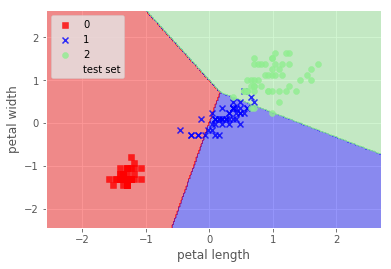

In [6]:
#decision region

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
utils_plots.plot_decision_regions(X=X_combined_std, 
                                  y=y_combined,
                                  classifier=ppn,
                                  test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### logistic regression

In [8]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [15]:
np.set_printoptions(precision=5, suppress=True)
lr.predict_proba(X_test_std[:5,:])

array([[0.     , 0.06316, 0.93684],
       [0.00061, 0.99929, 0.00011],
       [0.81696, 0.18304, 0.     ],
       [0.     , 0.41408, 0.58592],
       [0.80023, 0.19977, 0.     ]])

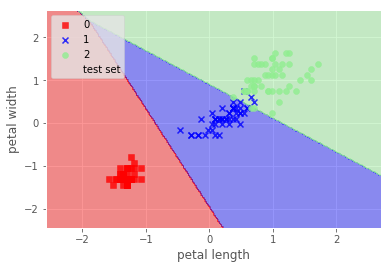

In [9]:
utils_plots.plot_decision_regions(X=X_combined_std, 
                                  y=y_combined,
                                  classifier=lr,
                                  test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()